### Import

In [465]:
import os
import sys
import numpy as np
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt

### Load Data

In [466]:
data = pd.read_csv('../data/spam.csv',encoding='latin-1')
data = data[['v1','v2']]
data.columns = ['y','text']

### Clean Text

In [467]:
texts = data['text'].values
newtexts = []
for text in texts:
    text = text
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = text.lower()
    text = text.split(' ')
    text = [item for item in text if len(item) > 1]
    text = ' '.join(text)
    newtexts.append(text)
data['text'] = newtexts

### Recode Label

In [468]:
labels = data['y'].values
newlabels = []
for label in labels:
    if label == 'spam':
        newlabels.append(1)
    else:
        newlabels.append(0)
data['y'] = newlabels

### Create Dictionaries

In [469]:
spamdic = {}
hamdic = {}
texts = data['text'].values
labels = data['y'].values
for t,text in enumerate(texts):
    label = labels[t]
    words = text.split(' ')
    for word in words:
        if (label == 1):
            if word not in spamdic:
                spamdic[word] = 1
            else:
                value = spamdic[word]
                spamdic[word] = value + 1
        if (label == 0):
            if word not in hamdic:
                hamdic[word] = 1
            else:
                value = hamdic[word]
                hamdic[word] = value + 1

### Laplacian smoothing

In [470]:
for word in hamdic:
    if word not in spamdic:
        spamdic[word] = 1
for word in spamdic:
    if word not in hamdic:
        hamdic[word] = 1

### Combine the dictionaries

In [471]:
totaldic = {}
for item in spamdic:
    word = item
    count = spamdic[word]
    totaldic[word] = count
for item in hamdic:
    word = item
    count = hamdic[word]
    prevcount = totaldic[word]
    totaldic[word] = count + prevcount

### Extract the keys and values and sort them back on indices

In [504]:
words = np.array(list(totaldic.keys()))
counts = np.array(list(totaldic.values()))

### Sort and plot

In [505]:
totalcounts = 200
indices = np.argsort(counts)[::-1]
indices = indices[:totalcounts]
dictcounts = counts[indices]
dictwords = list(words[indices])

### Plot the counts

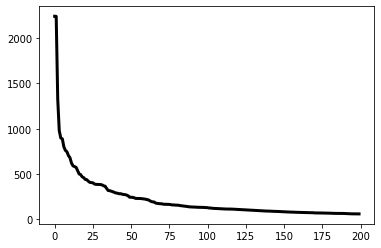

In [506]:
plt.plot(dictcounts,c='k',linewidth=3)

### Create Matrix of Binary and Counts

In [507]:
X = np.zeros((data.shape[0],totalcounts))
C = np.zeros((data.shape[0],totalcounts))
texts = data[['text']].values
for i in range(len(texts)):
    text = texts[i][0]
    words = text.split(' ')
    for word in words:
        if word in dictwords:
            index = dictwords.index(word)
            X[i,index] = X[i,index] + 1
            C[i,index] = 1   
DF = np.sum(X,axis=0)
DF = np.tile(DF,((X.shape[0],1)))
DF = DF / X.shape[0]
T = X / DF

In [508]:
T

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.455843  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.485281  ,  0.        ,  4.19578313, ..., 89.87096774,
         0.        ,  0.        ],
       [ 2.485281  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Plot binary

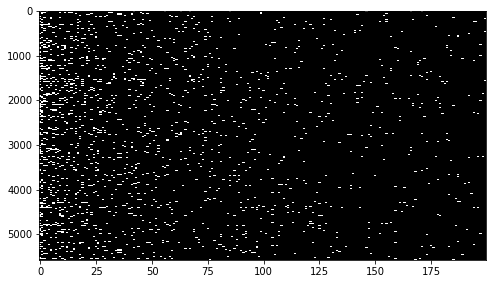

In [509]:
plt.figure(figsize=(8,8))
plt.imshow(C,aspect=0.02,cmap='gray',interpolation='nearest')
plt.savefig('MC.png',dpi=300)

### Plot count

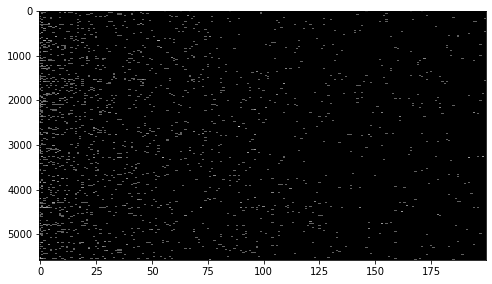

In [510]:
plt.figure(figsize=(8,8))
plt.imshow(np.log(X*4+1),aspect=0.02,cmap='gray',interpolation='nearest')
plt.savefig('MX.png',dpi=300)

### Plot TF-iDF

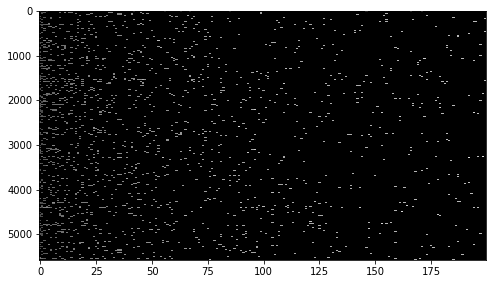

In [511]:
plt.figure(figsize=(8,8))
plt.imshow(np.log(T*4+1),aspect=0.02,cmap='gray',interpolation='nearest')
plt.savefig('MX.png',dpi=300)

### Draw DAGs

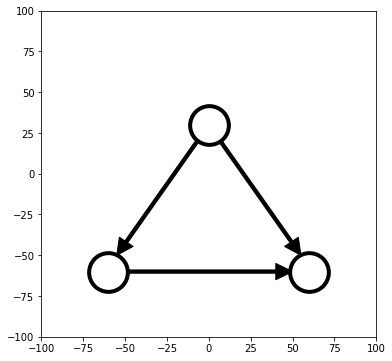

In [190]:
plt.figure(figsize=(6,6))
plt.scatter(0,30,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.scatter(-60,-60,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.scatter(60,-60,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.axis((-100,100,-100,100))
plt.arrow(0,30,55,-80,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.arrow(0,30,-55,-80,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.arrow(-60,-60,110,0,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.savefig('dag1.png',dpi=300)

### DAG with visibility node

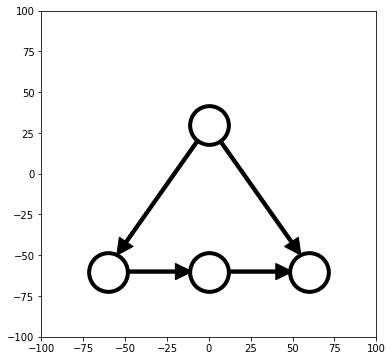

In [198]:
plt.figure(figsize=(6,6))
plt.scatter(0,30,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.scatter(-60,-60,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.scatter(60,-60,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.scatter(0,-60,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.axis((-100,100,-100,100))
plt.arrow(0,30,55,-80,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.arrow(0,30,-55,-80,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.arrow(-60,-60,50,0,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.arrow(0,-60,50,0,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.savefig('dag2.png',dpi=300)

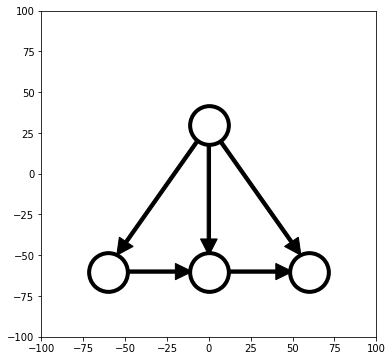

In [200]:
plt.figure(figsize=(6,6))
plt.scatter(0,30,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.scatter(-60,-60,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.scatter(60,-60,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.scatter(0,-60,s=1500,facecolor='w',edgecolor='k',linewidth=4,zorder=2)
plt.axis((-100,100,-100,100))
plt.arrow(0,30,0,-80,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.arrow(0,30,55,-80,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.arrow(0,30,-55,-80,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.arrow(-60,-60,50,0,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.arrow(0,-60,50,0,
          color='k',
          width = 2,
          length_includes_head = True,
          head_width = 10,
          head_length = 10,
          shape = 'full',
          overhang = 0,zorder=1)
plt.savefig('dag3.png',dpi=300)